<a href="https://colab.research.google.com/github/BlackCurrantDS/DBSE_Project/blob/main/OCT_training_data_merge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import glob

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

In [2]:
#concatinating all oct data into single dataframe

In [3]:
#concate all dataframe into one 
path = r'/content/drive/MyDrive/OCT_Training' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    print("for file {} there are {} values".format(filename,len(df)))
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


for file /content/drive/MyDrive/OCT_Training/oct_train_fifthN.csv there are 60065 values
for file /content/drive/MyDrive/OCT_Training/oct_train_firstN.csv there are 63129 values
for file /content/drive/MyDrive/OCT_Training/oct_train_sixthN.csv there are 60269 values
for file /content/drive/MyDrive/OCT_Training/oct_train_secondN.csv there are 60221 values
for file /content/drive/MyDrive/OCT_Training/oct_train_thirdN.csv there are 60256 values
for file /content/drive/MyDrive/OCT_Training/oct_train_fourthN.csv there are 60016 values


In [ ]:
frame.info()

In [5]:
frame['chargeback'].value_counts()

0    363878
1        78
Name: chargeback, dtype: int64

In [9]:
df= frame.copy()

Distribution

In [10]:
#encoding all the objects types
from sklearn import preprocessing
for f in df.columns:
    if df[f].dtype=='object' or df[f].dtype=='object': 
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(df[f].values) + list(df[f].values))
        df[f] = lbl.transform(list(df[f].values))

In [11]:
v_features = df.iloc[:,1:61].columns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

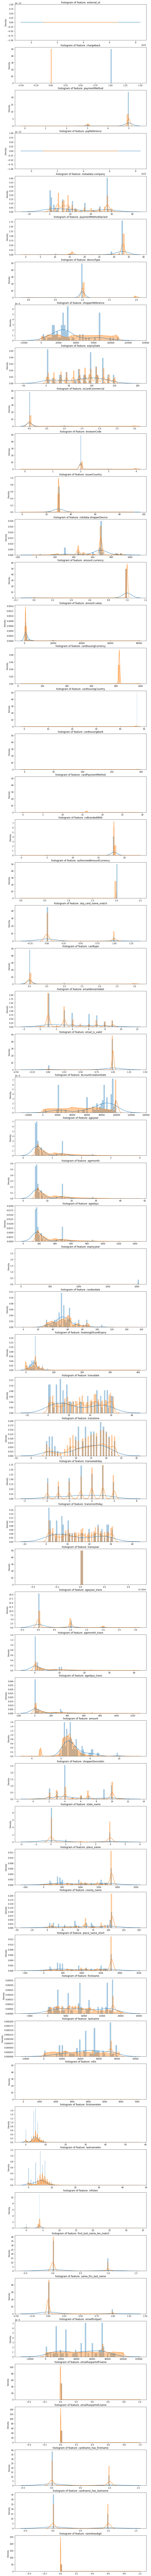

In [15]:
plt.figure(figsize=(12,60*4))
gs = gridspec.GridSpec(60, 1)
for i, cn in enumerate(df[v_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.chargeback== 1], bins=50)
    sns.distplot(df[cn][df.chargeback == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.savefig("OCT_data_feature_distribution")
plt.show()

In [16]:
#taek random sample from manjority class
s0 = df.chargeback[df.chargeback.eq(0)].sample(100000).index
s1 = df.chargeback[df.chargeback.eq(1)].sample(78).index 

df = df.loc[s0.union(s1)]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

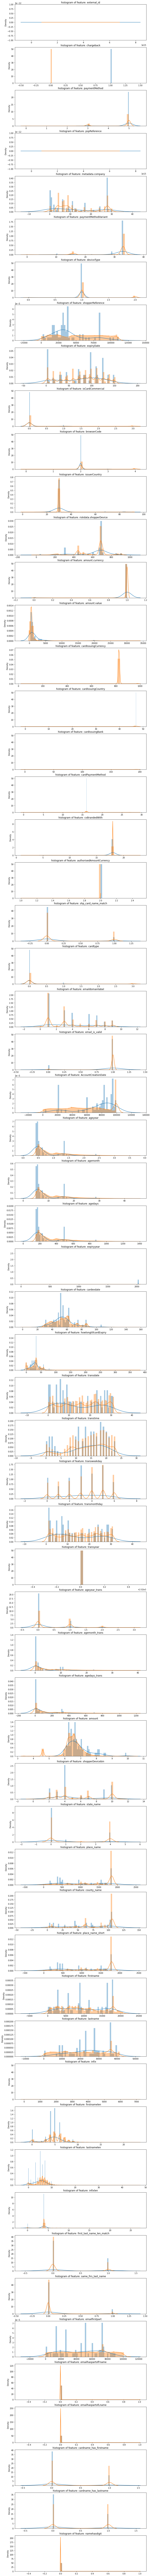

In [18]:
#checking distribution again
plt.figure(figsize=(12,60*4))
gs = gridspec.GridSpec(60, 1)
for i, cn in enumerate(df[v_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.chargeback== 1], bins=50)
    sns.distplot(df[cn][df.chargeback == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.savefig("OCT_data_feature_distribution_after_sampleing")
plt.show()

Getting place names

In [22]:
pd.crosstab(frame['county_name'],frame.chargeback).to_csv("county_name.csv")

In [23]:
pd.crosstab(frame['state_name'],frame.chargeback).to_csv("state_name.csv")

In [24]:
pd.crosstab(frame['place_name'],frame.chargeback).to_csv("place_name.csv")

In [27]:
df['external_id'].to_csv("/content/drive/MyDrive/oct_training_data_sample_psp_ref.csv")

Reading latlang data and processing

In [29]:
df_bookings = pd.read_csv("/content/drive/MyDrive/Oct_training_sample_latlang.csv")
df_bookings.head(3)

,webhook_id,trans_id,id,state,pickup_address,pickup_lat,pickup_lng,destination_address,destination_lat,destination_lng,pickup_relation_type,destination_relation_type,paid_at,ip,created_from_lat,created_from_lng
0,4536034861935745,4536034861935745,31645712.0,cancelled-dispatch,"15 MOUNT AVE, HESWALL, WIRRAL CH60 4RH, UK",53.326180,-3.098579,"12 NURSE ROAD, WIRRAL, CHESTER, CH617XH",53.354166,-3.088395,NaN,Riide\Models\FavoritePlace\FavoritePlace,NaN,148.252.128.131,53.340174,-3.093487
1,1539020934288454,1539020934288454,30782538.0,no-show,"168 MOORHOUSE RD, HULL HU5 5PT, UK",53.757713,-0.412904,"MARRAKECH RESTAURANT, 58 PRINCES AVENUE, HULL,...",53.754670,-0.359176,NaN,NaN,2020-10-07 17:57:09,194.207.162.42,53.756192,-0.386040
2,6159017460307649,6159017460307649,30626712.0,no-show,93 RENSHAW ST L1 2SP KNOWLEDGE QUARTER MERSEYSIDE,53.402460,-2.975440,"LIVERPOOL LIME STREET STATION, SKELHORNE ST EN...",53.407380,-2.978323,NaN,NaN,NaN,213.205.242.187,53.402460,-2.975443


In [30]:
#merging geo cordinated for each transaction in exisitng data
df = df.merge(df_bookings, left_on='external_id', how='left', right_on='webhook_id')

In [31]:
#fucntion to compute miles based on cordinated
def haversine_np_miles(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    miles = 3956 * c
    return miles

In [32]:
#miles fucntion applied to data
df['pickup_dest_distance_miles'] = (haversine_np_miles(df['pickup_lat'],df['pickup_lng'],df['destination_lat'],df['destination_lng']))

Getting totalc cards and users

In [58]:
df_cards = pd.read_csv("/content/drive/MyDrive/oct_training_data_total_cards.csv")
df_cards.head(2)

,user_id,total_cards,shopper_reference,stripe_id,pspReference
0,32739,11,cus_Bc8O82EAzuVxta,cus_Bc8O82EAzuVxta,1346016616305122
1,416317,11,cus_DtyfWfOENK4nia,cus_DtyfWfOENK4nia,4546028555570493


In [60]:
df_cards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41173 entries, 0 to 41172
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            41173 non-null  int64 
 1   total_cards        41173 non-null  int64 
 2   shopper_reference  41173 non-null  object
 3   stripe_id          41173 non-null  object
 4   pspReference       41173 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.6+ MB


In [44]:
df = df.merge(df_cards, left_on='external_id', how='left', right_on='pspReference')

In [ ]:
df.info()

Total cards ride

In [62]:
df_cards_add = pd.read_csv("/content/drive/MyDrive/oct_train_data_total_cards_ride.csv")
df_cards_add.head(2)

,user_id,total_cards,shopper_reference,stripe_id,pspReference
0,49293,10,RIIDE_USER_production_49293,cus_BqwcvJ4soSsSck,1739034587262771
1,12423,14,RIIDE_USER_production_12423,cus_CQDfmxJA45W9ie,4356029532201441


In [63]:
df = df.merge(df_cards_add, left_on='external_id', how='left', right_on='pspReference')

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100196 entries, 0 to 100195
Data columns (total 93 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  100196 non-null  int64  
 1   external_id                 100196 non-null  int64  
 2   chargeback                  100196 non-null  int64  
 3   paymentMethod               100196 non-null  int64  
 4   pspReference_x              100196 non-null  int64  
 5   metadata.company            100196 non-null  int64  
 6   paymentMethodVariant        100196 non-null  int64  
 7   deviceType                  100196 non-null  int64  
 8   shopperReference            100196 non-null  int64  
 9   expiryDate                  100196 non-null  int64  
 10  isCardCommercial            100196 non-null  int64  
 11  browserCode                 100196 non-null  int64  
 12  issuerCountry               100196 non-null  int64  
 13  riskdata.shopp

In [65]:
df['user_id'] = np.where(df["user_id_x"].isnull() == True, df["user_id_y"], df["user_id_x"] )

In [67]:
df['total_cards_combined'] = np.where(df["total_cards_x"].isnull() == True, df["total_cards"], df["total_cards_x"] )

In [ ]:
df.info()

Check distribution of total cards

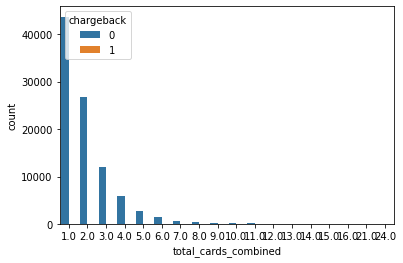

In [69]:
sns.countplot(data=df, x='total_cards_combined', hue='chargeback')

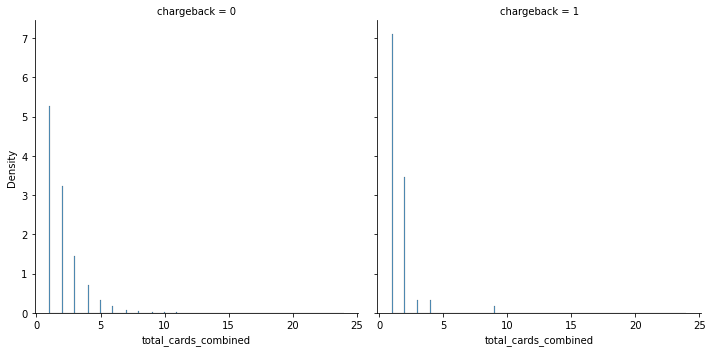

In [70]:
sns.displot(df, x="total_cards_combined", col="chargeback", multiple="dodge", stat="density", common_norm=False)

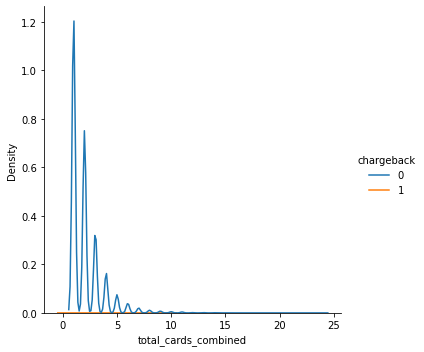

In [71]:
sns.displot(data=df, x='total_cards_combined', hue='chargeback', kind='kde')

In [72]:
pd.crosstab(df.total_cards_combined,df.chargeback)

chargeback,0,1
total_cards_combined,,
1.0,43698,43
2.0,26849,21
3.0,12011,2
4.0,5917,2
5.0,2672,0
6.0,1414,0
7.0,716,0
8.0,392,0
9.0,257,1


Distance

In [ ]:
sns.displot(df, x="pickup_dest_distance_miles", col="chargeback", multiple="dodge", stat="density", common_norm=False)

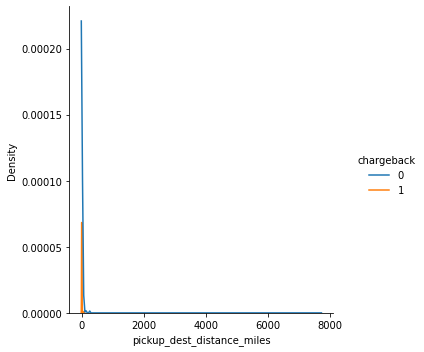

In [53]:
sns.displot(data=df, x='pickup_dest_distance_miles', hue='chargeback', kind='kde')

count of unique email first part

In [56]:
df['emailfirstpart'].value_counts(dropna=False, normalize=True)

72927    0.033654
42792    0.000359
32652    0.000329
61857    0.000299
6047     0.000289
           ...   
91081    0.000010
66501    0.000010
68548    0.000010
58297    0.000010
0        0.000010
Name: emailfirstpart, Length: 53323, dtype: float64

Number of locations per user

In [74]:
df.head(5)

,Unnamed: 0,external_id,chargeback,paymentMethod,pspReference_x,metadata.company,paymentMethodVariant,deviceType,shopperReference,expiryDate,isCardCommercial,browserCode,issuerCountry,riskdata.shopperDevice,amount.currency,amount.value,cardIssuingCurrency,cardIssuingCountry,cardIssuingBank,cardPaymentMethod,coBrandedWith,authorisedAmountCurrency,shp_card_name_match,cardtype,emaildomainlabel,email_is_valid,AccountCreationDate,ageyear,agemonth,agedays,expiryyear,cardexdate,howlongtillcardExpiry,transdate,transtime,transweekday,transmonthday,transyear,ageyear_trans,agemonth_trans,...,emailfirstpart,emailhaspartofFname,emailhaspartofLname,cardname_has_firstname,cardname_has_lastname,namehasdigit,emaillen,webhook_id,trans_id,id,state,pickup_address,pickup_lat,pickup_lng,destination_address,destination_lat,destination_lng,pickup_relation_type,destination_relation_type,paid_at,ip,created_from_lat,created_from_lng,pickup_dest_distance_miles,total_cards_x,shopper_reference_x,stripe_id_x,pspReference_y,user_id_x,total_cards_y,shopper_reference_y,stripe_id_y,pspReference_x,user_id_y,total_cards,shopper_reference,stripe_id,pspReference_y,user_id,total_cards_combined
0,2,4346022530461656,0,5,4346022530461656,9,33,1,97683,95,0,2,30,570,1,620.0,NaN,47,193,16,18,2,False,0,1,True,22418,1.346282,16.155380,491.719267,2021,38,20,8,16,4,9,2020,1.0,10,...,75588,False,False,False,False,False,13,4346022530461656,4346022530461656,30925230.0,2,39401,53.419660,-1.428887,"36 Hatherley Road, Sheffield, S91sn",53.414185,-1.398920,NaN,Riide\Models\FavoritePlace\FavoritePlace,2020-10-09 14:17:27,213.205.192.50,53.416922,-1.413903,2.103307,2.0,cus_GEvkt4ZG4H9GFu,cus_GEvkt4ZG4H9GFu,4.346023e+15,947980.0,2.0,cus_GEvkt4ZG4H9GFu,cus_GEvkt4ZG4H9GFu,4.346023e+15,4.0,1.0,cus_GEvkt4ZG4H9GFu,cus_8yvJOkU2TvYh7m,4.346023e+15,947980.0,2.0
1,10,1729022532676171,0,5,1729022532676171,4,33,1,79615,95,0,2,30,211,1,740.0,NaN,47,193,16,18,2,False,0,5,True,4541,2.207444,26.489329,806.252381,2021,38,31,8,16,4,9,2020,2.0,21,...,64524,False,False,False,True,False,8,1729022532676171,1729022532676171,30926464.0,2,55156,53.371769,-2.866424,"9 Crabtree Close, Netherley, Liverpool, L277al",53.389352,-2.842497,Riide\Models\FavoritePlace\FavoritePlace,Riide\Models\FavoritePlace\FavoritePlace,2020-10-09 14:48:54,82.132.214.102,53.380562,-2.854460,2.049255,1.0,cus_EL6SeEiOrgYB43,cus_EL6SeEiOrgYB43,1.729023e+15,462975.0,1.0,cus_EL6SeEiOrgYB43,cus_EL6SeEiOrgYB43,1.729023e+15,6.0,1.0,cus_EL6SeEiOrgYB43,cus_9BzHzd14els6zY,1.729023e+15,462975.0,1.0
2,12,1749022532857835,0,5,1749022532857835,20,33,1,32716,95,0,2,30,442,1,400.0,NaN,47,193,16,18,2,True,0,1,True,99598,NaN,NaN,NaN,2021,38,0,8,16,4,9,2020,NaN,0,...,19735,False,False,True,True,False,13,1749022532857835,1749022532857835,NaN,3,58186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1764385.0,1.0,RIIDE_USER_production_1764385,NaN,1.749023e+15,1764385.0,1.0
3,22,1339022535619113,0,5,1339022535619113,17,33,1,89302,110,0,2,30,686,1,600.0,NaN,47,193,16,18,2,True,0,3,True,32029,1.130690,13.568279,412.976026,2022,51,31,8,16,4,9,2020,1.0,8,...,97212,False,False,True,False,False,9,1339022535619113,1339022535619113,30926765.0,2,24861,51.887526,-0.425157,75 Copenhagen Close,51.919905,-0.461473,NaN,Riide\Models\RecentPlace\RecentPlace,2020-10-09 14:42:02,85.234.65.57,51.887034,-0.424783,3.359310,1.0,cus_FUMl134zGTurrk,cus_FUMl134zGTurrk,1.339023e+15,72586.0,1.0,cus_FUMl134zGTurrk,cus_FUMl134zGTurrk,1.339023e+15,NaN,NaN,NaN,NaN,NaN,72586.0,1.0
4,24,1859022535962281,0,5,1859022535962281,6,33,1,88073,15,0,2,30,687,1,560.0,NaN,47,193,16,18,2,True,0,3,True,11093,1.737870,20.854441,634.744013,2021,32,19,8,16,4,9,2020,1.0,15,...,4523,False,False,True,True,False,13,1859022535962281,1859022535962281,30926809.0,2,29105,53.394834,-3.013762,"Cammell Laird Gate House, Campbeltown Road, Bi...",53.385757,-3.013173,Riide\Models\RecentPlace\RecentPlace,Riide\Models\RecentPlace\RecentPlace,2020-10-09 14:37:25,31.53.237.131,53.395047,

In [82]:
df['pickup_add_count'] = df.groupby(['user_id'])['pickup_address'].nunique()

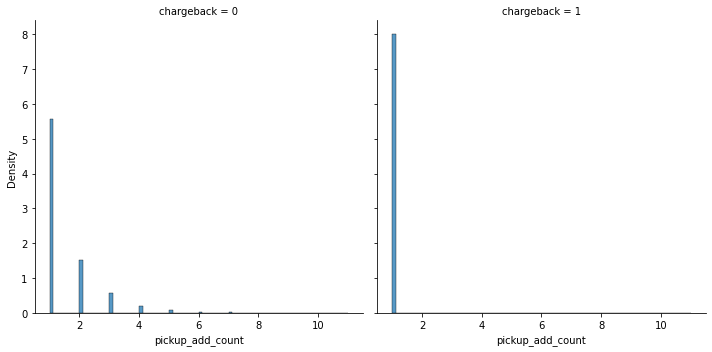

In [83]:
sns.displot(df, x="pickup_add_count", col="chargeback", multiple="dodge", stat="density", common_norm=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


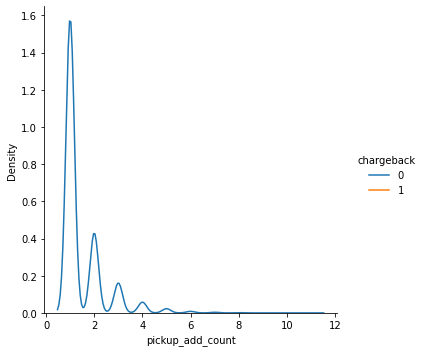

In [84]:
sns.displot(data=df, x='pickup_add_count', hue='chargeback', kind='kde')

In [85]:
df['destination_add_count'] = df.groupby(['user_id'])['destination_address'].nunique()

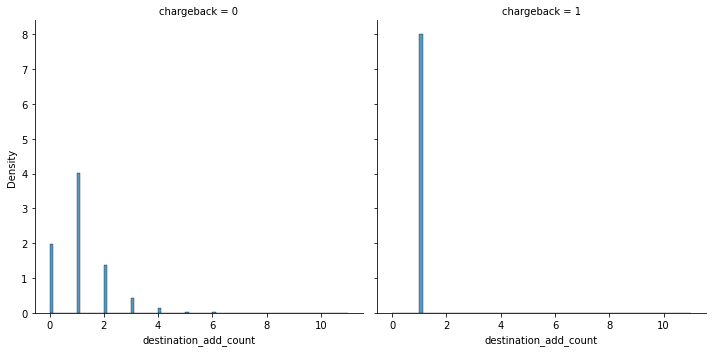

In [86]:
sns.displot(df, x="destination_add_count", col="chargeback", multiple="dodge", stat="density", common_norm=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


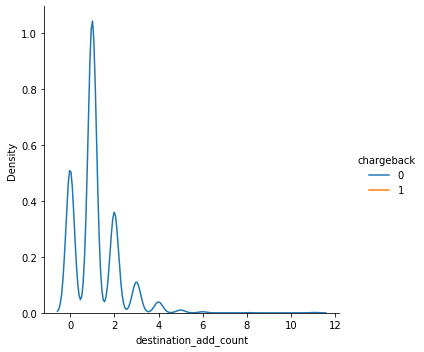

In [87]:
sns.displot(data=df, x='destination_add_count', hue='chargeback', kind='kde')

In [88]:
df['place_count'] = df.groupby(['user_id'])['place_name'].nunique()

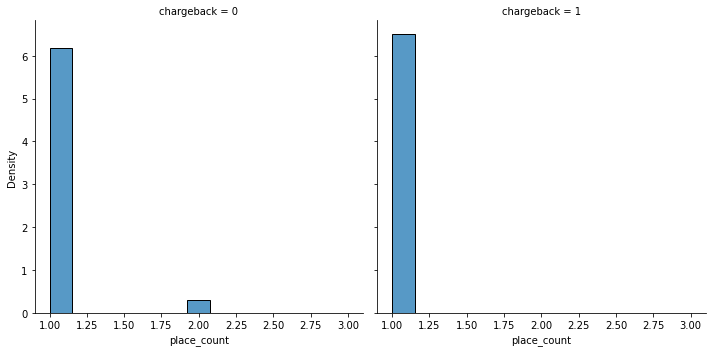

In [89]:
sns.displot(df, x="place_count", col="chargeback", multiple="dodge", stat="density", common_norm=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


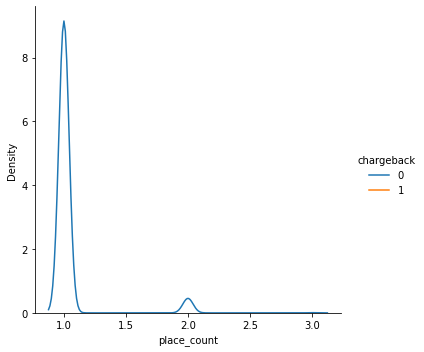

In [90]:
sns.displot(data=df, x='place_count', hue='chargeback', kind='kde')

In [91]:
df['county_count'] = df.groupby(['user_id'])['county_name'].nunique()

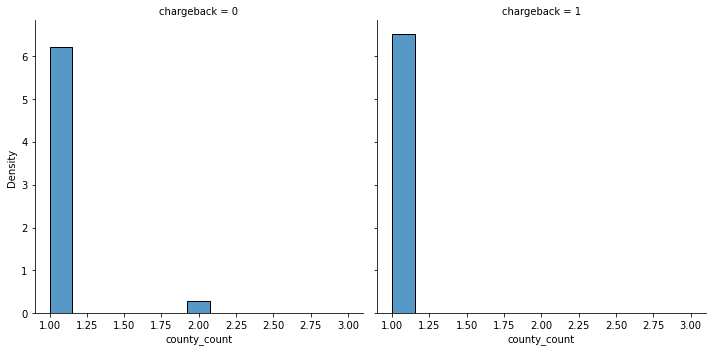

In [92]:
sns.displot(df, x="county_count", col="chargeback", multiple="dodge", stat="density", common_norm=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


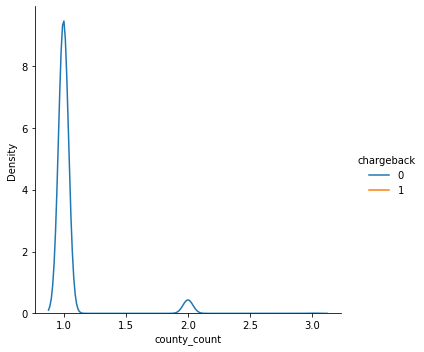

In [93]:
sns.displot(data=df, x='county_count', hue='chargeback', kind='kde')

State column

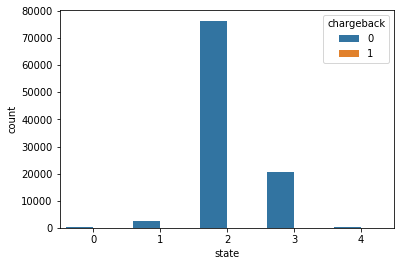

In [94]:
sns.countplot(data=df, x='state', hue='chargeback')

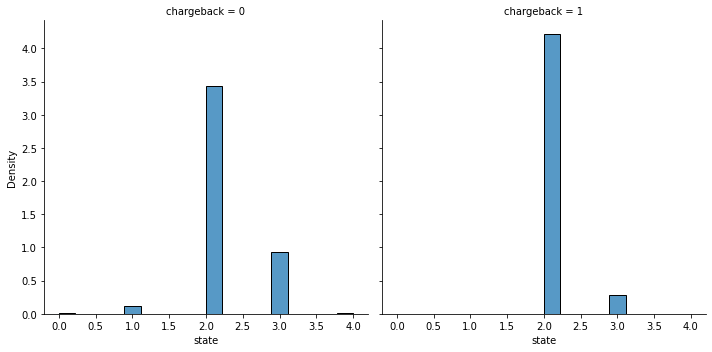

In [95]:
sns.displot(df, x="state", col="chargeback", multiple="dodge", stat="density", common_norm=False)

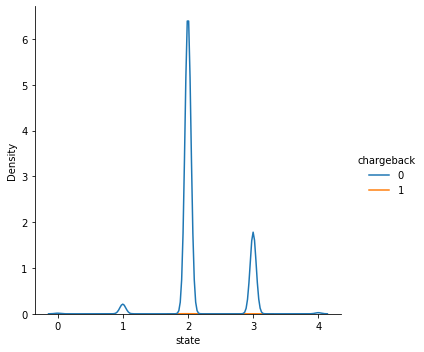

In [96]:
sns.displot(data=df, x='state', hue='chargeback', kind='kde')

In [97]:
pd.crosstab(df.state,df.chargeback)

chargeback,0,1
state,,
0,153,0
1,2453,0
2,76468,73
3,20755,5
4,289,0


Most frequent lat/lang to pickup lat lang distance

Most frequent place/address to drop place lat lang distance

In [114]:
df['freq_lat_src'] = df.groupby(['user_id'])['pickup_lat'].nlargest(1).reset_index(drop=True)
df['freq_lang_src'] = df.groupby(['user_id'])['pickup_lng'].nlargest(1).reset_index(drop=True)

In [115]:
df['freq_lat_src'].value_counts()

52.034449    71
52.034495    54
52.237473    41
52.061707    38
52.041770    26
             ..
53.392229     1
55.188465     1
55.006684     1
53.370122     1
55.004963     1
Name: freq_lat_src, Length: 37282, dtype: int64

In [116]:
df['freq_lang_src'].value_counts()

-0.773957    67
-0.773785    63
-0.728974    50
-0.906595    38
-0.687604    32
             ..
-2.260572     1
-1.406414     1
-1.674666     1
-2.965926     1
-1.500000     1
Name: freq_lang_src, Length: 37357, dtype: int64

In [117]:
#distanc ebetween most freq to exisiting 

In [118]:
#miles fucntion applied to data
df['dis_most_freq_to_curr_source'] = (haversine_np_miles(df['pickup_lat'],df['pickup_lng'],df['freq_lat_src'],df['freq_lang_src']))

In [119]:
df['dis_most_freq_to_curr_source'].value_counts()

0.000000      2
181.654837    2
9.294913      1
6.699346      1
169.831437    1
             ..
100.254097    1
131.109989    1
8.233389      1
107.945571    1
179.065379    1
Name: dis_most_freq_to_curr_source, Length: 35112, dtype: int64

In [120]:
pd.crosstab(df.dis_most_freq_to_curr_source,df.chargeback)

chargeback,0,1
dis_most_freq_to_curr_source,,
0.000000,2,0
0.012293,1,0
0.043931,1,0
0.057236,1,0
0.082643,1,0
...,...,...
2177.143372,1,0
2197.559997,1,0
2200.385231,1,0


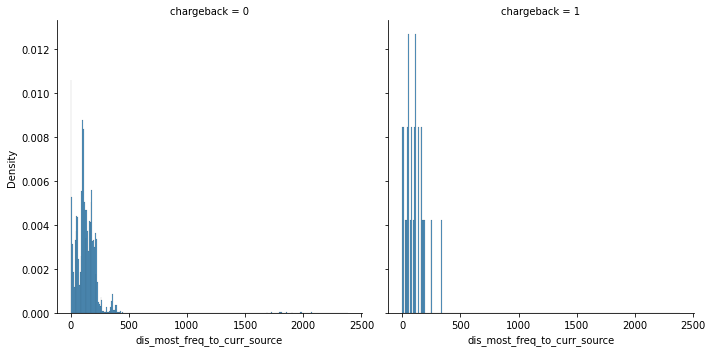

In [121]:
sns.displot(df, x="dis_most_freq_to_curr_source", col="chargeback", multiple="dodge", stat="density", common_norm=False)

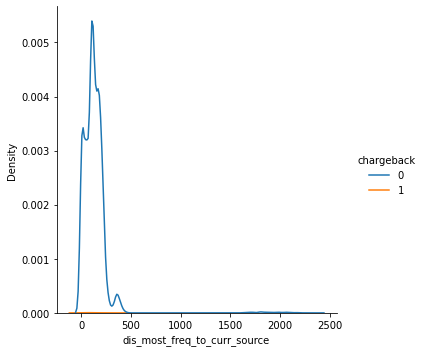

In [122]:
sns.displot(data=df, x='dis_most_freq_to_curr_source', hue='chargeback', kind='kde')

In [123]:
df['freq_lat_des'] = df.groupby(['user_id'])['destination_lat'].nlargest(1).reset_index(drop=True)
df['freq_lang_des'] = df.groupby(['user_id'])['destination_lng'].nlargest(1).reset_index(drop=True)

In [124]:
#miles fucntion applied to data
df['dis_most_freq_to_destination'] = (haversine_np_miles(df['destination_lat'],df['destination_lng'],df['freq_lat_des'],df['freq_lang_des']))

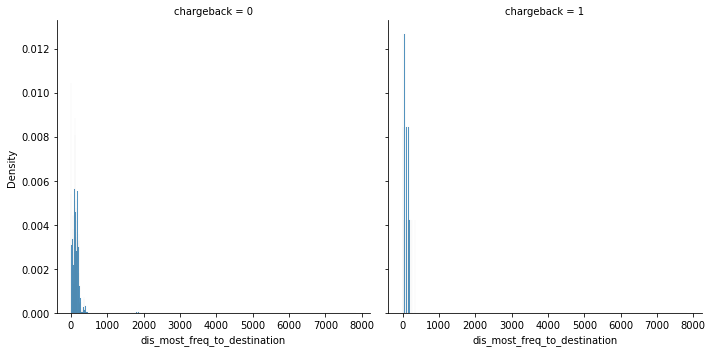

In [126]:
sns.displot(df, x="dis_most_freq_to_destination", col="chargeback", multiple="dodge", stat="density", common_norm=False)

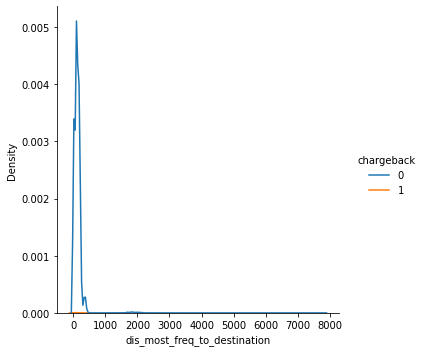

In [129]:
sns.displot(data=df, x='dis_most_freq_to_destination', hue='chargeback', kind='kde')


In [127]:
#most freq pick up to current destination
df['dis_most_freq_to_curr_destination'] = (haversine_np_miles(df['destination_lat'],df['destination_lng'],df['freq_lat_src'],df['freq_lang_src']))

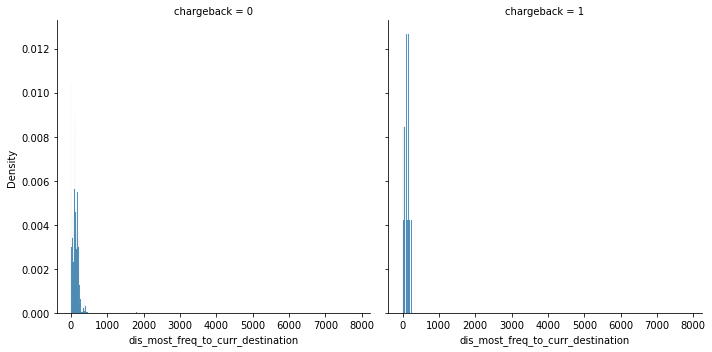

In [128]:
sns.displot(df, x="dis_most_freq_to_curr_destination", col="chargeback", multiple="dodge", stat="density", common_norm=False)

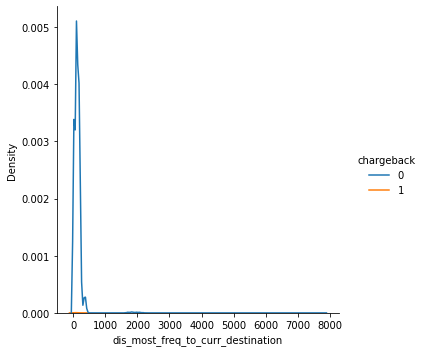

In [130]:
sns.displot(data=df, x='dis_most_freq_to_curr_destination', hue='chargeback', kind='kde')

Sample test

In [133]:
import numpy as np
from scipy.stats import ks_2samp

x =df[df['chargeback']==1]['dis_most_freq_to_curr_destination'].values
y = df[df['chargeback']==0]['dis_most_freq_to_curr_destination'].values

ks_2samp(x, y)
# p-value = .95 (no significant difference)

Ks_2sampResult(statistic=0.10791676078637463, pvalue=0.3241526633736346)

In [134]:
x =df[df['chargeback']==1]['dis_most_freq_to_curr_source'].values
y = df[df['chargeback']==0]['dis_most_freq_to_curr_source'].values

ks_2samp(x, y)

Ks_2sampResult(statistic=0.10375602942374151, pvalue=0.37103261745937666)

In [138]:
x =df[df['chargeback']==1]['pickup_dest_distance_miles'].values
y = df[df['chargeback']==0]['pickup_dest_distance_miles'].values

ks_2samp(x, y)

Ks_2sampResult(statistic=0.14334265054415274, pvalue=0.08128655078223028)

In [139]:
x =df[df['chargeback']==1]['total_cards_combined'].values
y = df[df['chargeback']==0]['total_cards_combined'].values

ks_2samp(x, y)

Ks_2sampResult(statistic=0.11587429397413618, pvalue=0.24618096943186474)

In [142]:
x =df[df['chargeback']==1]['amount'].values
y = df[df['chargeback']==0]['amount'].values

ks_2samp(x, y)

Ks_2sampResult(statistic=0.1365514334111389, pvalue=0.10930932306755624)